## US Accident Exploratory data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv(r'E:\archive\US_Accidents_Dec21_updated.csv')

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Data Prepeartion and Cleaning

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [142]:
missing_percentages=df.isna().sum().sort_values(ascending=True)/len(df)
missing_percentages=missing_percentages[missing_percentages>0]

<AxesSubplot:>

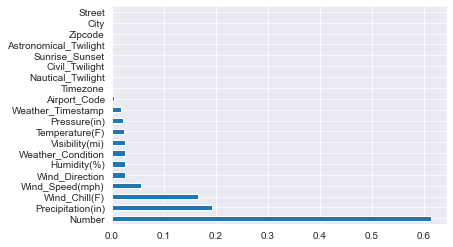

In [9]:
missing_percentages.plot(kind="barh")

## Univariate Analysis

In [10]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

City,Start time, Start lat, lang, Temperature, Weather condition

In [11]:
cities=(df['City'].unique())

In [12]:
cities_by_accident=df.groupby(by="City")['City'].count().sort_values(ascending=False)
print(type(cities_by_accident))

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='City'>

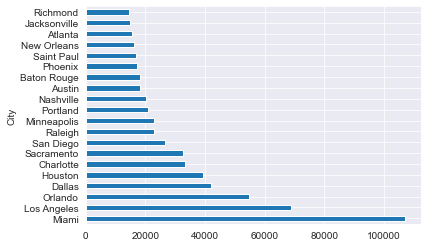

In [13]:
cities_by_accident.head(20).plot(kind="barh")


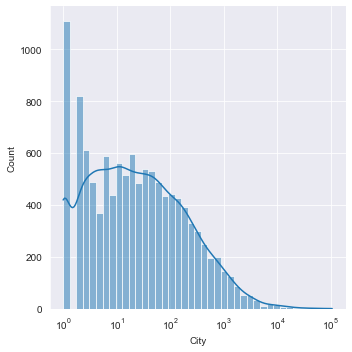

In [144]:
sns.displot(cities_by_accident,log_scale=True,kde="True")


In [15]:
cities_by_accident[cities_by_accident==1]

City
Beersheba Springs      1
District 6 Northern    1
Nutrioso               1
Loudonville            1
Odin                   1
                      ..
Prospect Hill          1
Brooklyn Heights       1
Prosper                1
Proviso                1
Dacono                 1
Name: City, Length: 1110, dtype: int64

Start Time

In [16]:
df['Start_Time'].head()

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:51:45
4    2016-02-08 07:53:43
Name: Start_Time, dtype: object

In [17]:
df['Start_Time']=pd.to_datetime(df['Start_Time'])
df['Start_Time'].head()

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:51:45
4   2016-02-08 07:53:43
Name: Start_Time, dtype: datetime64[ns]

In [18]:
df['Start_Time'].dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

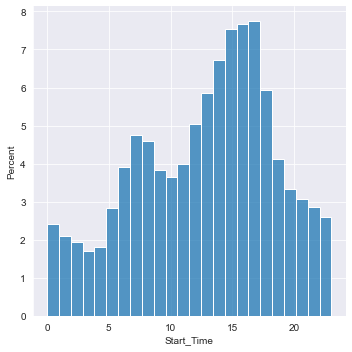

In [147]:
sns.displot(df['Start_Time'].dt.hour, bins=24,stat='percent')

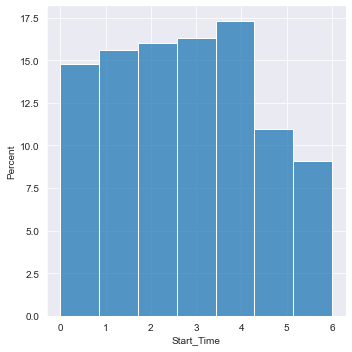

In [148]:
sns.displot(df['Start_Time'].dt.day_of_week, bins=7,stat="percent")

Is on weekends accident distribution same as that of on weekdays

In [21]:
weekend_start_time=df['Start_Time'][(df['Start_Time'].dt.day_of_week==5) | (df['Start_Time'].dt.day_of_week==6)]

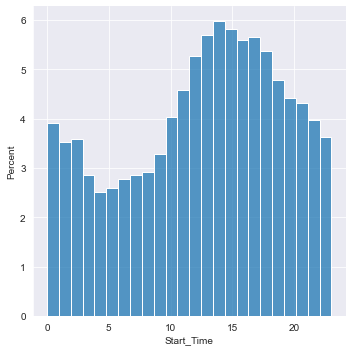

In [22]:
sns.displot(weekend_start_time.dt.hour, bins=24,stat="percent")

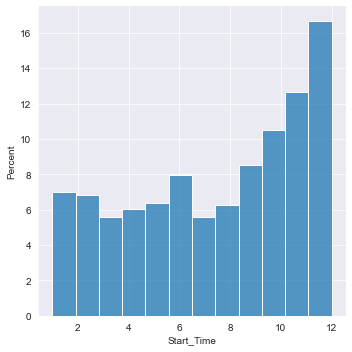

In [23]:
sns.displot(df['Start_Time'].dt.month, bins=12,stat="percent")

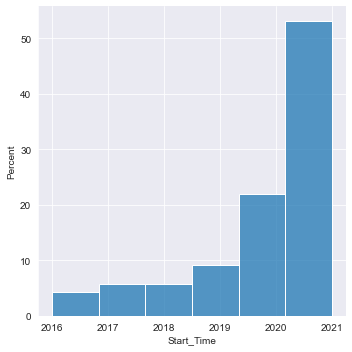

In [24]:
sns.displot(df['Start_Time'].dt.year, bins=6,stat="percent")

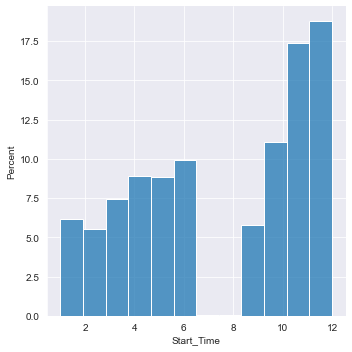

In [74]:
yearly_data=df['Start_Time'][df['Start_Time'].dt.year==2020]
sns.displot(yearly_data.dt.month, bins=12,stat="percent")

Data is missing for the years like 2016,2020

Start Latitude and longitude

In [26]:
df['Start_Lat'].head()

0    40.108910
1    39.865420
2    39.102660
3    41.062130
4    39.172393
Name: Start_Lat, dtype: float64

In [27]:
df['Start_Lng']

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

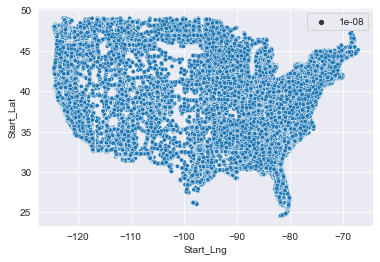

In [28]:
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],size=0.00000001)

In [29]:
from folium import plugins
from folium.plugins import HeatMap


In [30]:
sample_df=df.sample(int(0.001 * len(df)))
lat_lon=list(zip(list(sample_df['Start_Lat']),list(sample_df['Start_Lng'])))

In [31]:

map=folium.Map()
HeatMap(lat_lon).add_to(map)
map


Severity

In [32]:
df['Severity'].astype('category')

0          3
1          2
2          2
3          2
4          3
          ..
2845337    2
2845338    2
2845339    2
2845340    2
2845341    2
Name: Severity, Length: 2845342, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [33]:

severity=df.groupby(by='Severity')['Severity'].count()
severity

Severity
1      26053
2    2532991
3     155105
4     131193
Name: Severity, dtype: int64

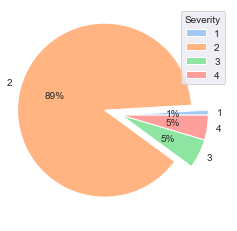

In [34]:
palette_color = sns.color_palette("pastel")
my_labels = "1","2","3","4"
myexplode = [0, 0.2, 0, 0]
plt.pie(severity,colors=palette_color,labels=my_labels,autopct='%.0f%%',explode=myexplode)
plt.legend(title="Severity")

Weather condtion

<AxesSubplot:title={'center':'Top 10 Weather Conditions'}>

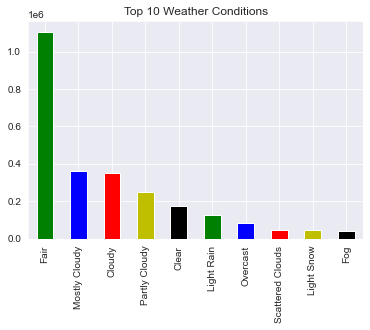

In [143]:
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color=tuple([ 'g', 'b','r','y','k']),title="Top 10 Weather Conditions")

# Bivariate Analysis based on severity of the accident

Variables condidered for the analysis
- 'Temperature(F)' ,'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)'

In [39]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [75]:
corr=df[['Severity','Temperature(F)' ,'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)']]

<AxesSubplot:>

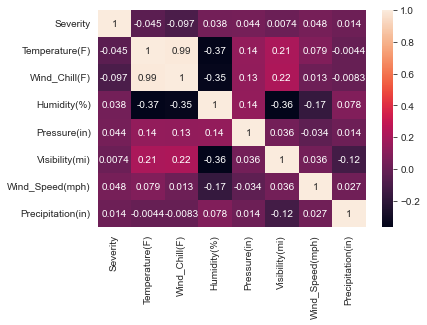

In [76]:
ax = sns.heatmap(corr.corr(), annot=True)
ax

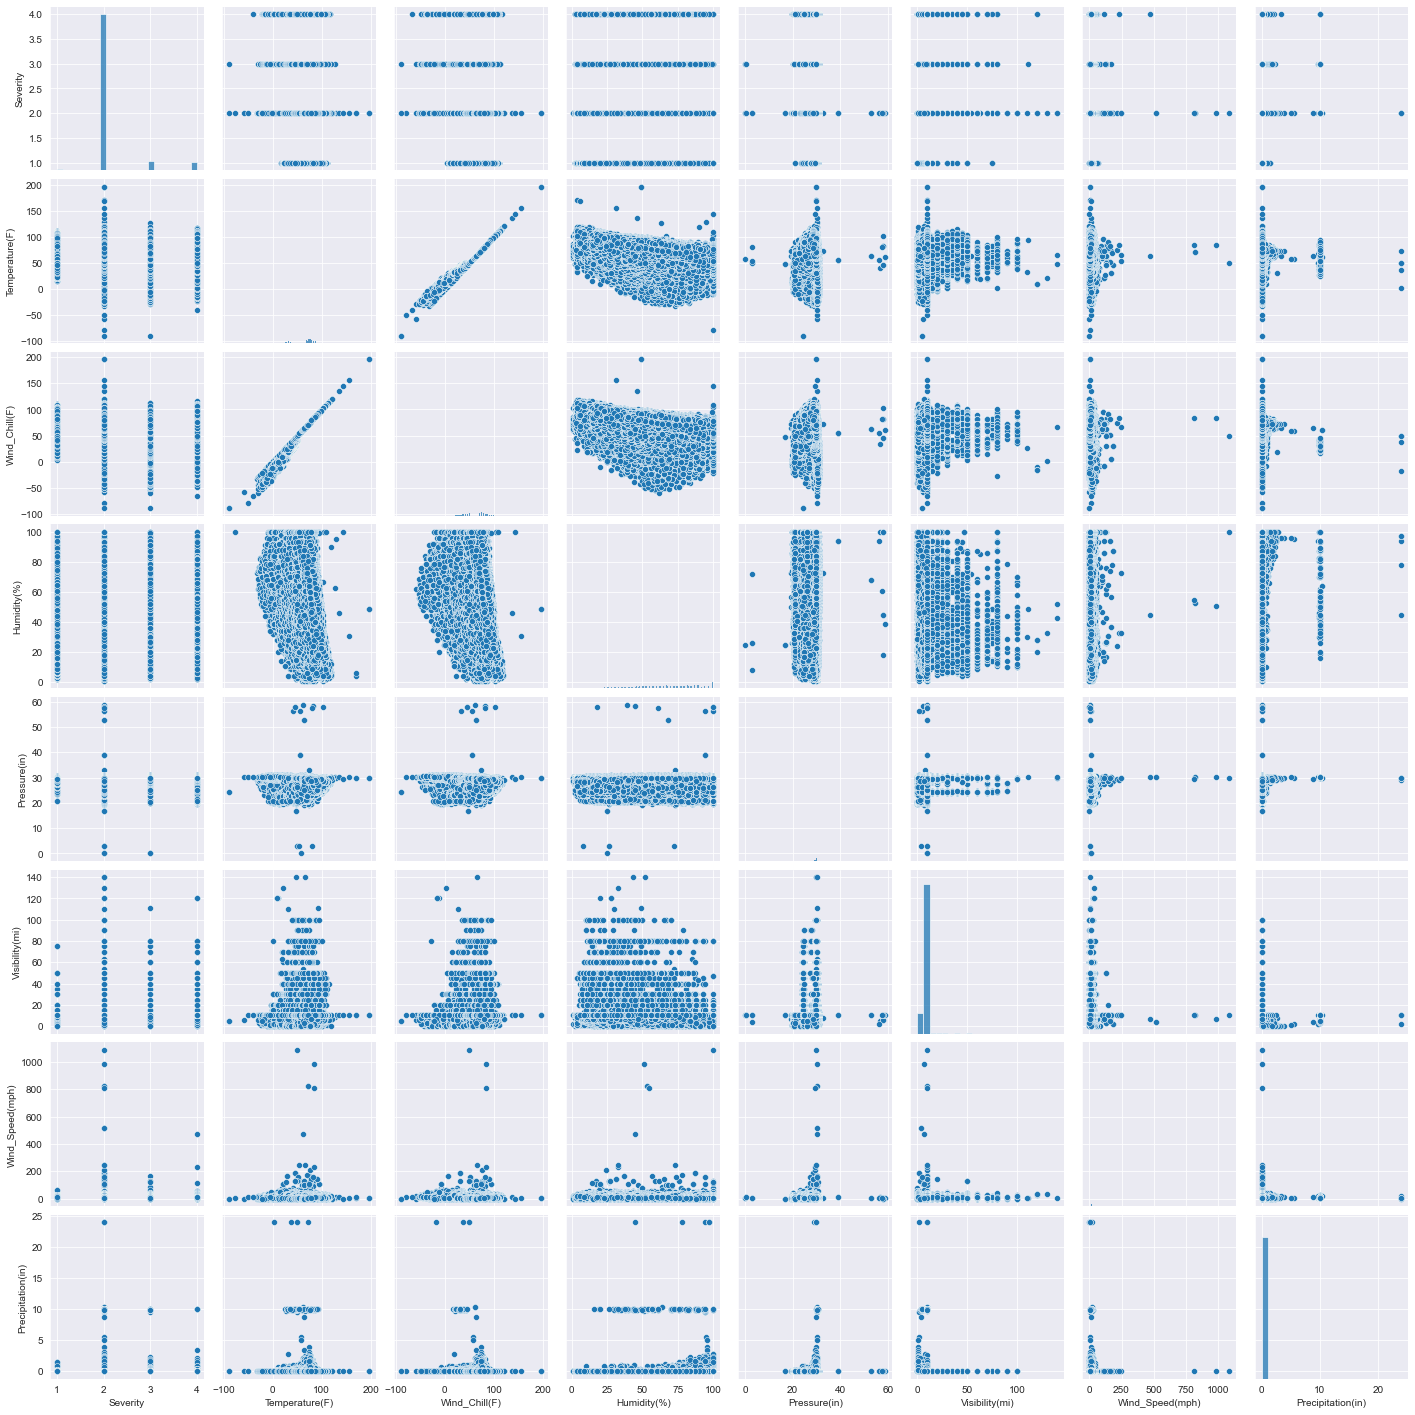

In [79]:
sns.pairplot(corr)

Severity Impact by Temperature

<AxesSubplot:xlabel='Severity', ylabel='Temperature(F)'>

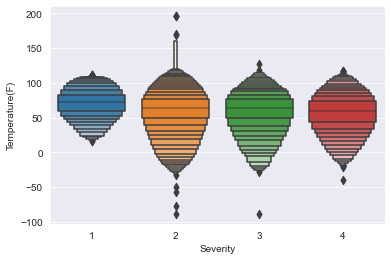

In [80]:
sns.boxenplot(data=corr, x="Severity", y='Temperature(F)', scale="linear")

- Median temperature for all severity is at 50 to 60 degrees (F). Its summer time and everyone is driving around.
- Severity 2, 3, 4 - Density is high around 0 and crosses -50. So mostly winters due to snow, i

Severity Impact by Humidity(%)

<AxesSubplot:xlabel='Severity', ylabel='Humidity(%)'>

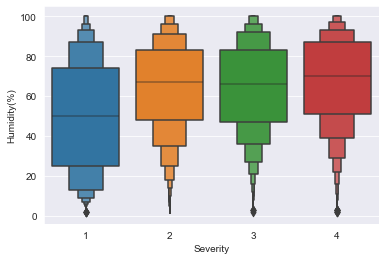

In [82]:
sns.boxenplot(data=corr, x="Severity", y='Humidity(%)')

- Severe accidents occur when the Humidity is around 80%

Severity Impact by Pressure(in)

<AxesSubplot:xlabel='Severity', ylabel='Pressure(in)'>

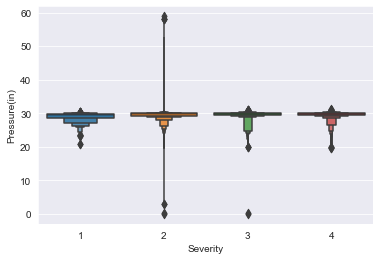

In [83]:
sns.boxenplot(data=corr, x="Severity", y='Pressure(in)')

- Severe accidents occur when the pressure is around 30

Severity Impact by Visibility(mi)

<AxesSubplot:xlabel='Severity', ylabel='Visibility(mi)'>

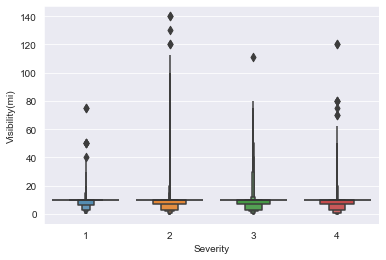

In [85]:
sns.boxenplot(data=corr, x="Severity", y='Visibility(mi)')

- Severe accidents occur when the visibility is low (0-10 miles)

Severity Impact by Wind_Speed(mph)

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

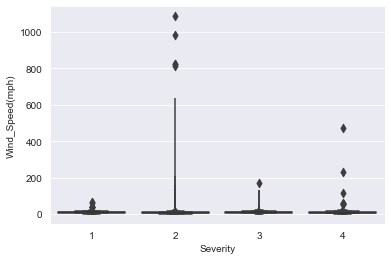

In [86]:
sns.boxenplot(data=corr, x="Severity", y='Wind_Speed(mph)')

- There is no such relatiion between windspeed and severity of the accident

Severity Impact by Precipitation(in)

<AxesSubplot:xlabel='Severity', ylabel='Precipitation(in)'>

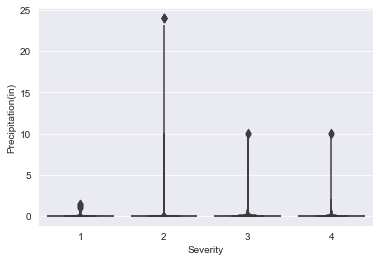

In [87]:
sns.boxenplot(data=corr, x="Severity", y='Precipitation(in)')

- Correlation between Perciptation and severity cannot be determined

## Questions: 
1. Which state has the highest number of accident/per capita  
2. Are there more accidents in warmer or colder areas 
3. Does new your in data (highest population)? Why low accidents 
4. Among top 100 cities in the most number of accident, which state do they belong to? 
5. What time of day the accidents most frequent in? 
6. Which day of the week most accidents occur? 
7. which months have most accidents? 
8. What is the trend of accident over years? 
9. What is the Severity of the accidents
10. In What weather conditions accidents occur?

## Insights: 
- No data for New York (Most populated city) 
- No. of accidents per city decreases/increases explonentially 
- Less than 5% of cities has accidents more than 1000 per year 
- Over 1100 cities have reported just 1 accident (investigation required) 
- Most accidents occur 12-3 PM
- Accidents occur more in winters 
- 80% of the accidents has level 2 Severity
- Most accidents occur in fair weather condition